In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
train_features=pd.read_csv('/kaggle/input/vaccine-data/training_set_features.csv')
train_label=pd.read_csv('/kaggle/input/vaccine-data/training_set_labels.csv')
test=pd.read_csv('/kaggle/input/vaccine-data/test_set_features.csv')
submission=pd.read_csv('/kaggle/input/vaccine-data/submission_format.csv')

In [3]:
submission.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [4]:
submission.shape

(26708, 3)

In [5]:
train_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
train_features['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [7]:
train_features.shape

(26707, 36)

In [8]:
train_label.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [9]:
train_label.shape

(26707, 3)

In [10]:
test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [11]:
test.shape

(26708, 36)

# EDA ON TRAIN_FEATURES

In [12]:
train_features.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [13]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [14]:
special_characters = set('[]<>')

# Function to remove special characters from a string
def remove_special_characters(feature_name, special_characters):
    return ''.join(char for char in feature_name if char not in special_characters)

# Clean feature names
train_features.columns = [remove_special_characters(col, special_characters) for col in train_features.columns]



<Axes: >

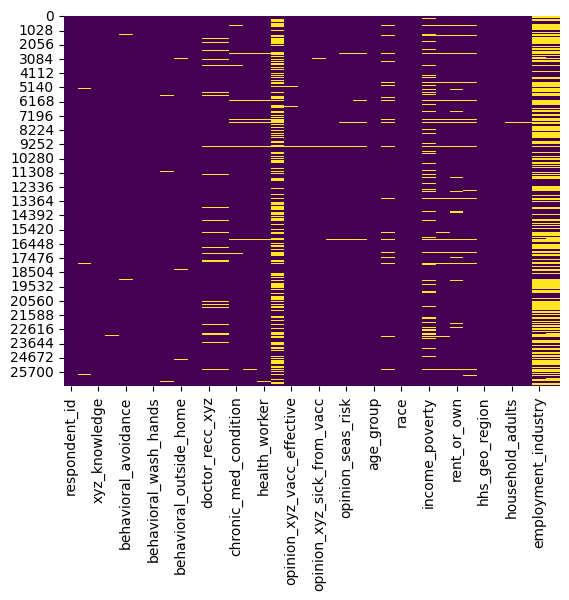

In [15]:
sns.heatmap(train_features.isnull(), cbar=False, cmap='viridis')

In [16]:
train_features.shape

(26707, 36)

In [17]:
categorical_columns = test.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_categories = test[col].unique()
    print(f"Column: {col}")
    print(f"Categories: {unique_categories}")
    print()

# Count the number of categorical columns
num_categorical_columns = len(categorical_columns)
print(num_categorical_columns)

Column: age_group
Categories: ['35 - 44 Years' '18 - 34 Years' '55 - 64 Years' '65+ Years'
 '45 - 54 Years']

Column: education
Categories: ['College Graduate' '12 Years' 'Some College' '< 12 Years' nan]

Column: race
Categories: ['Hispanic' 'White' 'Black' 'Other or Multiple']

Column: sex
Categories: ['Female' 'Male']

Column: income_poverty
Categories: ['> $75,000' 'Below Poverty' '<= $75,000, Above Poverty' nan]

Column: marital_status
Categories: ['Not Married' 'Married' nan]

Column: rent_or_own
Categories: ['Rent' 'Own' nan]

Column: employment_status
Categories: ['Employed' 'Not in Labor Force' 'Unemployed' nan]

Column: hhs_geo_region
Categories: ['mlyzmhmf' 'bhuqouqj' 'lrircsnp' 'lzgpxyit' 'fpwskwrf' 'oxchjgsf'
 'dqpwygqj' 'qufhixun' 'kbazzjca' 'atmpeygn']

Column: census_msa
Categories: ['MSA, Not Principle  City' 'Non-MSA' 'MSA, Principle City']

Column: employment_industry
Categories: ['atmlpfrs' 'nduyfdeo' nan 'fcxhlnwr' 'pxcmvdjn' 'arjwrbjb' 'mfikgejo'
 'rucpziij' 'wxley

In [18]:
train_features.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [19]:
train_features['xyz_concern']=train_features['xyz_concern'].fillna(train_features['xyz_concern'].median())
train_features['xyz_knowledge']=train_features['xyz_knowledge'].fillna(train_features['xyz_knowledge'].median())
train_features['behavioral_antiviral_meds']=train_features['behavioral_antiviral_meds'].fillna(train_features['behavioral_antiviral_meds'].median())
train_features['behavioral_avoidance']=train_features['behavioral_avoidance'].fillna(train_features['behavioral_avoidance'].mode()[0])
train_features['behavioral_face_mask']=train_features['behavioral_face_mask'].fillna(train_features['behavioral_face_mask'].mode()[0])
train_features['behavioral_wash_hands']=train_features['behavioral_wash_hands'].fillna(train_features['behavioral_wash_hands'].mode()[0])
train_features['behavioral_large_gatherings']=train_features['behavioral_large_gatherings'].fillna(train_features['behavioral_large_gatherings'].mode()[0])
train_features['behavioral_outside_home']=train_features['behavioral_outside_home'].fillna(train_features['behavioral_outside_home'].mode()[0])
train_features['behavioral_touch_face']=train_features['behavioral_touch_face'].fillna(train_features['behavioral_touch_face'].mode()[0])
train_features['doctor_recc_xyz']=train_features['doctor_recc_xyz'].fillna(train_features['doctor_recc_xyz'].mode()[0])
train_features['doctor_recc_seasonal']=train_features['doctor_recc_seasonal'].fillna(train_features['doctor_recc_seasonal'].mode()[0])
train_features['chronic_med_condition']=train_features['chronic_med_condition'].fillna(train_features['chronic_med_condition'].mode()[0])
train_features['child_under_6_months']=train_features['child_under_6_months'].fillna(train_features['child_under_6_months'].mode()[0])
train_features['health_worker']=train_features['health_worker'].fillna(train_features['health_worker'].mode()[0])
train_features['health_insurance']=train_features['health_insurance'].fillna(train_features['health_insurance'].mode()[0])
train_features['opinion_xyz_vacc_effective']=train_features['opinion_xyz_vacc_effective'].fillna(train_features['opinion_xyz_vacc_effective'].mode()[0])
train_features['opinion_xyz_risk']=train_features['opinion_xyz_risk'].fillna(train_features['opinion_xyz_risk'].mode()[0])
train_features['opinion_xyz_sick_from_vacc']=train_features['opinion_xyz_sick_from_vacc'].fillna(train_features['opinion_xyz_sick_from_vacc'].mode()[0])
train_features['opinion_seas_vacc_effective']=train_features['opinion_seas_vacc_effective'].fillna(train_features['opinion_seas_vacc_effective'].mode()[0])
train_features['opinion_seas_risk']=train_features['opinion_seas_risk'].fillna(train_features['opinion_seas_risk'].mode()[0])
train_features['opinion_seas_sick_from_vacc']=train_features['opinion_seas_sick_from_vacc'].fillna(train_features['opinion_seas_sick_from_vacc'].mode()[0])
train_features['education']=train_features['education'].fillna(train_features['education'].mode()[0])
train_features['income_poverty']=train_features['income_poverty'].fillna(train_features['income_poverty'].mode()[0])
train_features['marital_status']=train_features['marital_status'].fillna(train_features['marital_status'].mode()[0])
train_features['rent_or_own']=train_features['rent_or_own'].fillna(train_features['rent_or_own'].mode()[0])
train_features['employment_status']=train_features['employment_status'].fillna(train_features['employment_status'].mode()[0])
train_features['household_adults']=train_features['household_adults'].fillna(train_features['household_adults'].mode()[0])
train_features['household_children']=train_features['household_children'].fillna(train_features['household_children'].mode()[0])

In [20]:
train_features.drop(columns=['employment_industry','employment_occupation','hhs_geo_region'],inplace=True)

In [21]:
train_features=pd.get_dummies(train_features,columns=['age_group','education','race','sex','income_poverty','marital_status',
                                                     'rent_or_own','employment_status','census_msa'],drop_first=True)

In [22]:
train_features.shape

(26707, 43)

# EDA ON TEST

In [23]:
test.shape

(26708, 36)

In [24]:
test.isnull().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [25]:
categorical_columns = test.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_categories = test[col].unique()
    print(f"Column: {col}")
    print(f"Categories: {unique_categories}")
    print()

# Count the number of categorical columns
num_categorical_columns = len(categorical_columns)
print(num_categorical_columns)

Column: age_group
Categories: ['35 - 44 Years' '18 - 34 Years' '55 - 64 Years' '65+ Years'
 '45 - 54 Years']

Column: education
Categories: ['College Graduate' '12 Years' 'Some College' '< 12 Years' nan]

Column: race
Categories: ['Hispanic' 'White' 'Black' 'Other or Multiple']

Column: sex
Categories: ['Female' 'Male']

Column: income_poverty
Categories: ['> $75,000' 'Below Poverty' '<= $75,000, Above Poverty' nan]

Column: marital_status
Categories: ['Not Married' 'Married' nan]

Column: rent_or_own
Categories: ['Rent' 'Own' nan]

Column: employment_status
Categories: ['Employed' 'Not in Labor Force' 'Unemployed' nan]

Column: hhs_geo_region
Categories: ['mlyzmhmf' 'bhuqouqj' 'lrircsnp' 'lzgpxyit' 'fpwskwrf' 'oxchjgsf'
 'dqpwygqj' 'qufhixun' 'kbazzjca' 'atmpeygn']

Column: census_msa
Categories: ['MSA, Not Principle  City' 'Non-MSA' 'MSA, Principle City']

Column: employment_industry
Categories: ['atmlpfrs' 'nduyfdeo' nan 'fcxhlnwr' 'pxcmvdjn' 'arjwrbjb' 'mfikgejo'
 'rucpziij' 'wxley

In [26]:
test['xyz_concern']=test['xyz_concern'].fillna(test['xyz_concern'].median())
test['xyz_knowledge']=test['xyz_knowledge'].fillna(test['xyz_knowledge'].median())
test['behavioral_antiviral_meds']=test['behavioral_antiviral_meds'].fillna(test['behavioral_antiviral_meds'].median())
test['behavioral_avoidance']=test['behavioral_avoidance'].fillna(test['behavioral_avoidance'].mode()[0])
test['behavioral_face_mask']=test['behavioral_face_mask'].fillna(test['behavioral_face_mask'].mode()[0])
test['behavioral_wash_hands']=test['behavioral_wash_hands'].fillna(test['behavioral_wash_hands'].mode()[0])
test['behavioral_large_gatherings']=test['behavioral_large_gatherings'].fillna(test['behavioral_large_gatherings'].mode()[0])
test['behavioral_outside_home']=test['behavioral_outside_home'].fillna(test['behavioral_outside_home'].mode()[0])
test['behavioral_touch_face']=test['behavioral_touch_face'].fillna(test['behavioral_touch_face'].mode()[0])
test['doctor_recc_xyz']=test['doctor_recc_xyz'].fillna(test['doctor_recc_xyz'].mode()[0])
test['doctor_recc_seasonal']=test['doctor_recc_seasonal'].fillna(test['doctor_recc_seasonal'].mode()[0])
test['chronic_med_condition']=test['chronic_med_condition'].fillna(test['chronic_med_condition'].mode()[0])
test['child_under_6_months']=test['child_under_6_months'].fillna(test['child_under_6_months'].mode()[0])
test['health_worker']=test['health_worker'].fillna(test['health_worker'].mode()[0])
test['health_insurance']=test['health_insurance'].fillna(test['health_insurance'].mode()[0])
test['opinion_xyz_vacc_effective']=test['opinion_xyz_vacc_effective'].fillna(test['opinion_xyz_vacc_effective'].mode()[0])
test['opinion_xyz_risk']=test['opinion_xyz_risk'].fillna(test['opinion_xyz_risk'].mode()[0])
test['opinion_xyz_sick_from_vacc']=test['opinion_xyz_sick_from_vacc'].fillna(test['opinion_xyz_sick_from_vacc'].mode()[0])
test['opinion_seas_vacc_effective']=test['opinion_seas_vacc_effective'].fillna(test['opinion_seas_vacc_effective'].mode()[0])
test['opinion_seas_risk']=test['opinion_seas_risk'].fillna(test['opinion_seas_risk'].mode()[0])
test['opinion_seas_sick_from_vacc']=test['opinion_seas_sick_from_vacc'].fillna(test['opinion_seas_sick_from_vacc'].mode()[0])
test['education']=test['education'].fillna(test['education'].mode()[0])
test['income_poverty']=test['income_poverty'].fillna(test['income_poverty'].mode()[0])
test['marital_status']=test['marital_status'].fillna(test['marital_status'].mode()[0])
test['rent_or_own']=test['rent_or_own'].fillna(test['rent_or_own'].mode()[0])
test['employment_status']=test['employment_status'].fillna(test['employment_status'].mode()[0])
test['household_adults']=test['household_adults'].fillna(test['household_adults'].mode()[0])
test['household_children']=test['household_children'].fillna(test['household_children'].mode()[0])


In [27]:
test.drop(columns=['employment_industry','employment_occupation','hhs_geo_region'],inplace=True)

In [28]:
test=pd.get_dummies(test,columns=['age_group','education','race','sex','income_poverty','marital_status',
                                                     'rent_or_own','employment_status','census_msa'],drop_first=True)

In [29]:
test.shape

(26708, 43)

In [30]:
test = test.drop(test.sample().index)

In [31]:
special_characters = set('[]<>')

# Function to check for special characters in feature names
def contains_special_characters(feature_name, special_characters):
    return any(char in special_characters for char in feature_name)

# List to store features with special characters
features_with_special_characters = []

# Check each feature name
for feature in train_features.columns:
    if contains_special_characters(feature, special_characters):
        features_with_special_characters.append(feature)

# Report features with special characters
if features_with_special_characters:
    print("Features with special characters:", features_with_special_characters)
else:
    print("No features with special characters found.")

Features with special characters: ['education_< 12 Years', 'income_poverty_> $75,000']


# MAKING MODEL

In [32]:
X = train_features.drop(columns=['respondent_id'])
y = train_label[['xyz_vaccine', 'seasonal_vaccine']]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [35]:
base_classifier = LogisticRegression(max_iter=1000)

In [36]:
model = MultiOutputClassifier(base_classifier)

In [37]:
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000))

In [38]:
model.predict_proba(X_train)

[array([[0.92751398, 0.07248602],
        [0.95554182, 0.04445818],
        [0.93780818, 0.06219182],
        ...,
        [0.90044382, 0.09955618],
        [0.95278814, 0.04721186],
        [0.94769016, 0.05230984]]),
 array([[0.88533543, 0.11466457],
        [0.19494563, 0.80505437],
        [0.80098476, 0.19901524],
        ...,
        [0.75277661, 0.24722339],
        [0.87651662, 0.12348338],
        [0.83004502, 0.16995498]])]

In [39]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba_xyz = y_pred_proba[0][:, 1]
y_pred_proba_seasonal = y_pred_proba[1][:, 1]

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_xyz = roc_auc_score(y_test['xyz_vaccine'], y_pred_proba_xyz)
roc_auc_seasonal = roc_auc_score(y_test['seasonal_vaccine'], y_pred_proba_seasonal)
mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2

print(f'ROC AUC for XYZ Vaccine: {roc_auc_xyz}')
print(f'ROC AUC for Seasonal Vaccine: {roc_auc_seasonal}')
print(f'Mean ROC AUC: {mean_roc_auc}')


ROC AUC for XYZ Vaccine: 0.8303553268164146
ROC AUC for Seasonal Vaccine: 0.8537084760697478
Mean ROC AUC: 0.8420319014430812


In [41]:
X_test_final = test.drop(columns=['respondent_id'])

# Make predictions
y_pred_proba_final=model.predict_proba(X_test_final)

In [42]:
y_pred_proba_xyz_final=y_pred_proba_final[0][:, 1]
y_pred_proba_seasonal_final = y_pred_proba_final[1][:, 1]

In [43]:
predictions_df_final = pd.DataFrame({
    'respondent_id': test['respondent_id'],
    'xyz_vaccine': y_pred_proba_xyz_final,
    'seasonal_vaccine': y_pred_proba_seasonal_final
})

In [44]:
predictions_df_final.to_csv('Predictions_final.csv', index=False)

In [45]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Ensure correct dtypes
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)

# initialize binary relevance multi-label classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

# accuracy
from sklearn.metrics import accuracy_score
print("Accuracy = ", accuracy_score(y_test, predictions.toarray()))


Accuracy =  0.5920323498577206


In [46]:
 #using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifiers = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifiers.fit(X_train, y_train)
# predict
predictions = classifiers.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy =  0.6856372622435225




In [47]:
train_features.dtypes

respondent_id                             int64
xyz_concern                             float64
xyz_knowledge                           float64
behavioral_antiviral_meds               float64
behavioral_avoidance                    float64
behavioral_face_mask                    float64
behavioral_wash_hands                   float64
behavioral_large_gatherings             float64
behavioral_outside_home                 float64
behavioral_touch_face                   float64
doctor_recc_xyz                         float64
doctor_recc_seasonal                    float64
chronic_med_condition                   float64
child_under_6_months                    float64
health_worker                           float64
health_insurance                        float64
opinion_xyz_vacc_effective              float64
opinion_xyz_risk                        float64
opinion_xyz_sick_from_vacc              float64
opinion_seas_vacc_effective             float64
opinion_seas_risk                       